In [1]:
import pandas as pd
import numpy as np
url = 'https://worldpopulationreview.com/countries'
df = pd.read_html(url, header = 0)
df 

[     Rank        Country  2022 Population  2021 Population Growth Rate  \
 0       1          China       1448471400     1.444216e+09       0.29%   
 1       2          India       1406631776     1.393409e+09       0.95%   
 2       3  United States        334805269     3.329151e+08       0.57%   
 3       4      Indonesia        279134505     2.763618e+08       1.00%   
 4       5       Pakistan        229488994     2.251999e+08       1.90%   
 ..    ...            ...              ...              ...         ...   
 204   205     San Marino            34085     3.401700e+04       0.20%   
 205   206          Palau            18233     1.816900e+04       0.35%   
 206   207         Tuvalu            12066     1.193100e+04       1.13%   
 207   208          Nauru            10903     1.087600e+04       0.25%   
 208   209   Vatican City              799     8.000000e+02      -0.12%   
 
         Area Density (km²)  
 0    9706961       149/km²  
 1    3287590       428/km²  
 2    93

In [2]:
len (df)

1

ser på topp 7 land med størst populasjonsvekst

In [3]:
df2022 = df[0]

In [4]:
df2022.shape

(209, 7)

In [5]:
df2022

,Rank,Country,2022 Population,2021 Population,Growth Rate,Area,Density (km²)
0,1,China,1448471400,1.444216e+09,0.29%,9706961,149/km²
1,2,India,1406631776,1.393409e+09,0.95%,3287590,428/km²
2,3,United States,334805269,3.329151e+08,0.57%,9372610,36/km²
3,4,Indonesia,279134505,2.763618e+08,1.00%,1904569,147/km²
4,5,Pakistan,229488994,2.251999e+08,1.90%,881912,260/km²
...,...,...,...,...,...,...,...
204,205,San Marino,34085,3.401700e+04,0.20%,61,559/km²
205,206,Palau,18233,1.816900e+04,0.35%,459,40/km²
206,207,Tuvalu,12066,1.193100e+04,1.13%,26,464/km²
207,208,Nauru,10903,1.087600e+04,0.25%,21,519/km²


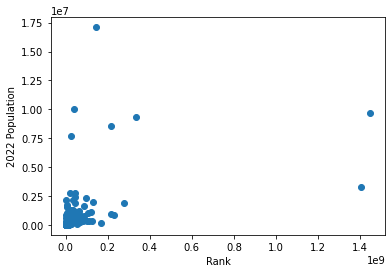

In [6]:
from matplotlib import pyplot as plt
fig,ax=plt.subplots()
ax.set_ylabel('2022 Population')
ax.set_xlabel('Rank')
ax.scatter(df2022['2022 Population'], df2022['Area'],  label='Growth Rate')


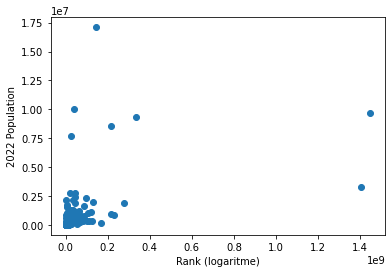

In [7]:
from matplotlib import pyplot as plt
fig,ax=plt.subplots()
ax.set_ylabel('2022 Population')
ax.set_xlabel('Rank (logaritme)')
ax.scatter(df2022['2022 Population'], df2022['Area'],  label='Growth Rate')


In [8]:
grafene viser stigningen i populasjonen i de landene med høyest vekst

SyntaxError: invalid syntax (3520769379.py, line 1)

In [9]:
y=df2022['Area']
pd.DataFrame(y)

,Area
0,9706961
1,3287590
2,9372610
3,1904569
4,881912
...,...
204,61
205,459
206,26
207,21


In [10]:
x=pd.DataFrame(np.log(df2022['Area']))
x['intercept']=1
x

,Area,intercept
0,16.088354,1
1,15.005665,1
2,16.053302,1
3,14.459766,1
4,13.689848,1
...,...,...
204,4.110874,1
205,6.129050,1
206,3.258097,1
207,3.044522,1


Lager en linjær regresjonsmodell og plotter denne med populasjon omgjort til logaritmiske verdier

In [11]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


                            OLS Regression Results                            
Dep. Variable:                   Area   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     55.41
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           2.59e-12
Time:                        11:52:11   Log-Likelihood:                -3287.5
No. Observations:                 209   AIC:                             6579.
Df Residuals:                     207   BIC:                             6586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Area        2.943e+05   3.95e+04      7.443      0.0

In [12]:
res.params

Area         2.943346e+05
intercept   -2.615345e+06
dtype: float64

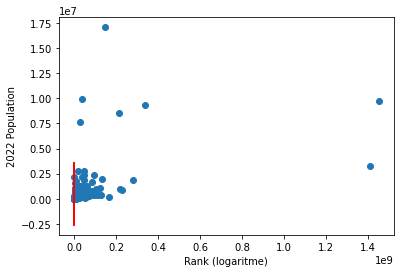

In [26]:
x=np.linspace(min(np.log(df2022['Area'])), max(np.log(df2022['2022 Population'])), 100)

regression_line=res.params['intercept']+res.params['Area']*x

ax.plot(x, regression_line,color='red')
fig

In [ ]:
linjen viser ikke en gjennomsnittelig vekst og passer ikke særlig godt til dataene. regresjonslinjen viser at landene 
med høyest populasjonsvekst vil forbli de samme i årene som kommer. 